In [ ]:
# https://www.kaggle.com/code/fortjohnson/markov-chains-and-hidden-markov-models

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from hmmlearn import hmm

In [2]:
class Random_Variable:

    def __init__(self, name, values, probability_distribution):
        self.name = name
        self.values = values
        self.probability_distribution = probability_distribution
        if all(type(item) is np.int64 for item in values):
            self.type = 'numeric'
            self.rv = stats.rv_discrete(name = name, values = (values, probability_distribution))
        elif all(type(item) is str for item in values):
            self.type = 'symbolic'
            self.rv = stats.rv_discrete(name = name, values = (np.arange(len(values)), probability_distribution))
            self.symbolic_values = values
        else:
            self.type = 'undefined'

    def sample(self,size):
        if (self.type =='numeric'):
            return self.rv.rvs(size=size)
        elif (self.type == 'symbolic'):
            numeric_samples = self.rv.rvs(size=size)
            mapped_samples = [self.values[x] for x in numeric_samples]
            return mapped_samples

    def probs(self):
        return self.probability_distribution

    def vals(self):
        print(self.type)
        return self.values

In [3]:
values = ['S', 'C']
probabilities = [0.5, 0.5]
weather = Random_Variable('weather', values, probabilities)
samples = weather.sample(365)

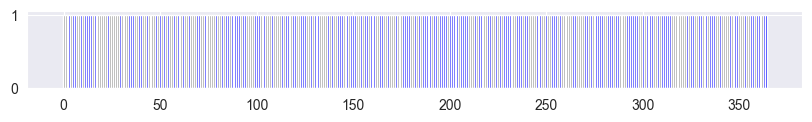

In [4]:
state2color = {}
state2color['S'] = 'blue'
state2color['C'] = 'grey'

def plot_weather_samples(samples, state2color):
    colors = [state2color[x] for x in samples]
    x = np.arange(0, len(colors))
    y = np.ones(len(colors))
    plt.figure(figsize=(10,1))
    plt.bar(x, y, color=colors, width=1)

plot_weather_samples(samples, state2color)

In [7]:

def markov_chain(transmat, state, state_names, samples):
    (rows, cols) = transmat.shape
    rvs = []
    values = list(np.arange(0,rows))

    # create random variables for each row of transition matrix
    for r in range(rows):
        rv = Random_Variable("row" + str(r), values, transmat[r])
        rvs.append(rv)

    # start from initial state and then sample the appropriate
    # random variable based on the state following the transitions
    states = []
    for n in range(samples):
        state = rvs[state].sample(1)[0]
        states.append(state_names[state])
    return states

In [8]:
# transition matrices for the Markov Chain
transmat1 = np.array([[0.7, 0.3],
                    [0.2, 0.8]])

transmat2 = np.array([[0.9, 0.1],
                    [0.1, 0.9]])

transmat3 = np.array([[0.5, 0.5],
                     [0.5, 0.5]])

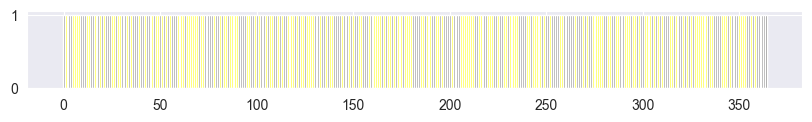

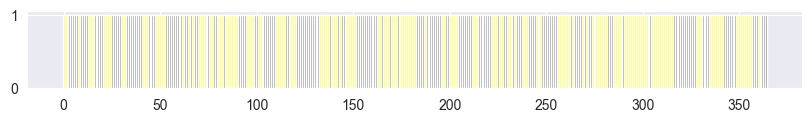

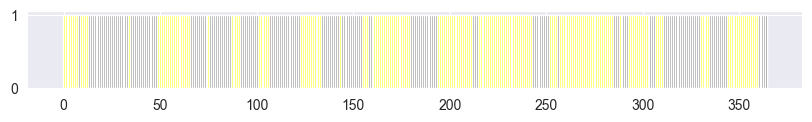

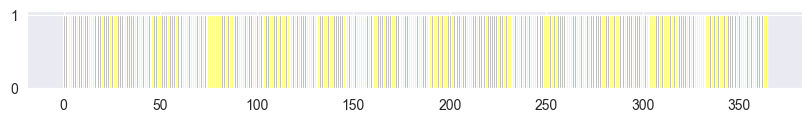

In [9]:
# plot the iid model too

state2color = {}
state2color['S'] = 'yellow'
state2color['C'] = 'grey'
samples = weather.sample(365)

plot_weather_samples(samples, state2color)

samples1 = markov_chain(transmat1,0,['S','C'], 365)
plot_weather_samples(samples1, state2color)

samples2 = markov_chain(transmat2,0,['S','C'], 365)
plot_weather_samples(samples2, state2color)

samples3 = markov_chain(transmat3,0,['S','C'], 365)
plot_weather_samples(samples3, state2color)


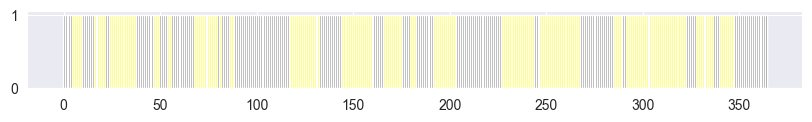

In [10]:
state2color = {}
state2color['S'] = 'yellow'
state2color['C'] = 'grey'

samples = weather.sample(365)
states = markov_chain(transmat2,0,['S','C'], 365)
plot_weather_samples(states, state2color)

sunny_colors = Random_Variable('sunny_colors', ['y', 'r', 'b', 'g'],
                              [0.4, 0.4, 0.1, 0.1])
cloudy_colors = Random_Variable('cloudy_colors', ['y', 'r', 'b', 'g'],
                               [0.1, 0.1, 0.6, 0.2])

In [11]:
def emit_sample(state, sunny_colors, cloudy_colors):
    if (state == 'S'):
        sample = sunny_colors.sample(1)[0]
    else:
        sample = cloudy_colors.sample(1)[0]
    return sample

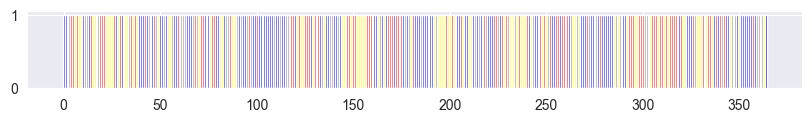

In [12]:
samples = [emit_sample(s, sunny_colors, cloudy_colors) for s in states]
state2color = {}
state2color['y'] = 'yellow'
state2color['r'] = 'red'
state2color['b'] = 'blue'
state2color['g'] = 'grey'
plot_weather_samples(samples, state2color)

In [13]:
transmat = np.array([[0.9, 0.1],
                    [0.1, 0.9]])

start_prob = np.array([1.0, 0.0, 0.0])

# yellow and red have high probs for sunny
# blue and grey have high probs for cloudy
emission_probs = np.array([[0.4, 0.4, 0.1, 0.1],
                           [0.1, 0.1, 0.6, 0.2]])

In [14]:
model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = start_prob
model.transmat_ = transmat
model.emissionprob_ = emission_probs

MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


In [18]:
# sample the model - X is the observed values
# and Z is the "hidden" states
model.sample(n_samples=365)

ValueError: startprob_ must have length n_components

NameError: name 'X' is not defined